In [1]:
import pandas as pd
import seaborn as sns

### Processing time collected from Bayes by running below commands

bash /opt/local/bin/run_py_job.sh -p cpu -c 32 -e base -s mp-pi-montecarlo-pool.py -- --workers 1 --steps 10000000
bash /opt/local/bin/run_py_job.sh -p cpu -c 32 -e base -s mp-pi-montecarlo-pool.py -- --workers 2 --steps 10000000
bash /opt/local/bin/run_py_job.sh -p cpu -c 32 -e base -s mp-pi-montecarlo-pool.py -- --workers 4 --steps 10000000
bash /opt/local/bin/run_py_job.sh -p cpu -c 32 -e base -s mp-pi-montecarlo-pool.py -- --workers 8 --steps 10000000
bash /opt/local/bin/run_py_job.sh -p cpu -c 32 -e base -s mp-pi-montecarlo-pool.py -- --workers 16 --steps 10000000
bash /opt/local/bin/run_py_job.sh -p cpu -c 32 -e base -s mp-pi-montecarlo-pool.py -- --workers 32--steps 10000000

We changed the number of workers keeping the cpus_per_task fixed at 32. The execution times were recorded in job-times.xlsx

Increasing number of workers would make use of the same number of cores. Although the number of CPU cores to be used here are high compared to the number of workers but for N workers only N cores were utilised and 32-N cores were left idle. 

In [2]:
df = pd.read_excel('job-times.xlsx')
print(df)

   Processers    Time
0           1  2.9500
1           2  1.4615
2           4  0.7630
3           8  0.4340
4          16  0.3490
5          32  0.2750


### The function below calculates the theoretical speed up by using Amdahl's law.

In [68]:
def theoretical_speedup(n):
    """
    Calculates speed up using Amdahl's law.
    :param n: number of processors
    :return: Theoretical speedup proprotional to the size of parallelizable code.
    """
    p = 1 # parallelization percentage
    s = (1-p) # serial percentage
    return 1/(s + (p/n))



### Theoretical Speedup Vs Measured Speed up

Speed up is calculated as => Old execution time/New execution time


In [69]:
t_speed_up = list(map(theoretical_speedup, [1, 2, 4, 8, 16, 32]))
nl = '\n'
print(f'Theoretical Speed-up {nl} {t_speed_up}' )

Theoretical Speed-up 
 [1.0, 2.0, 4.0, 8.0, 16.0, 32.0]


In [70]:
performance = df['Time']
speed_up_real = lambda per: per[0]/per # ratio 
actual_speed_up = speed_up_real(performance)
nl = '\n'
print(f'Measured speed up {nl}{actual_speed_up}')

Measured speed up 
0     1.000000
1     2.018474
2     3.866317
3     6.797235
4     8.452722
5    10.727273
Name: Time, dtype: float64


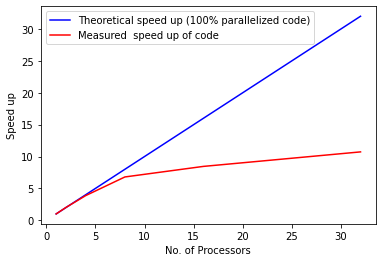

In [72]:
import matplotlib.pyplot as plt

fig = sns.lineplot(data=df, x="Processers", y=t_speed_up, color='blue')
sns.lineplot(data=df, x="Processers", y=actual_speed_up, color='red')
fig.set(xlabel="No. of Processors", ylabel="Speed up")

plt.legend(labels=['Theoretical speed up (100% parallelized code)', 'Measured  speed up of code'])
           
# if 50% serial code is 50% then speed up is never more than 2.